# Assignment 1 (Stochastic Processes)


## Q1:State your student id and the values of p1, p2, p3, p4.
### Taking 7-digit student number, appending a random digit to the end to make it an 8 digit number.
### Methodology: p1: take the first 2 digits of your number and divide by 100. p2: take the second 2 digits of your number and divide by 100. p3: take the third 2 digits of your number and divide by 100. p4: take the fourth 2 digits of your number and divide by 100.

#### Student ID = 3140151, adding a random number '0' to make it 31401510.
P1=31/100 = 0.31, P2=40/100 = 0.40, P3=15/100 = 0.15, P4=10/100 = 0.10

#### Normalizing:
To make these probabilities true (i.e., sum to 1), we need to normalize them.
##### We divide each probability by the sum of all probabilities
P(normalized) = Pn/Sum of Pn. 

Sum=p1+p2+p3+p4 = 0.31+0.4+0.15+0.1 = 0.96

P(norm.)1 = 0.31/0.96 = 0.33,
P(norm.)2 = 0.4/0.96 = 0.417,
P(norm.)3 = 0.15/0.96 = 0.156,
P(norm.)4 = 0.1/0.96 = 0.104,

Now, check that the sum of the normalized probabilities is 1:
0.33+0.417+0.156+0.104 ~=~ 1





## Q2:Some stochastic process, with states labelled A, B, C, D, E, has the following tranisition matrix:

In [10]:
P <- matrix(c(0.18, 0.1, 0.23, 0.02, 0.47,
              0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 1.0, 0.0, 0.0,
              0.31, 0.19, 0.21, "x", 0.13,
              0.22, 0.32, 0.08, 0.28, 0.10), nrow = 5, byrow = TRUE)
P

0.18,0.1,0.23,0.02,0.47
0,1,0,0,0
0,0,1,0,0
0.31,0.19,0.21,x,0.13
0.22,0.32,0.08,0.28,0.1


### Expalanation:
#### (a) Given that the matrix is stochastic matrix, the sum of each row = 1
#### To find the value of "x":
0.31+0.19+0.21+x+0.13 = 1
#### Solving for "x"
x = 1−0.84 = 0.16

0.18,0.10,0.23,0.02,0.47
0.00,1.00,0.00,0.00,0.00
0.00,0.00,1.00,0.00,0.00
0.31,0.19,0.21,0.16,0.13
0.22,0.32,0.08,0.28,0.10


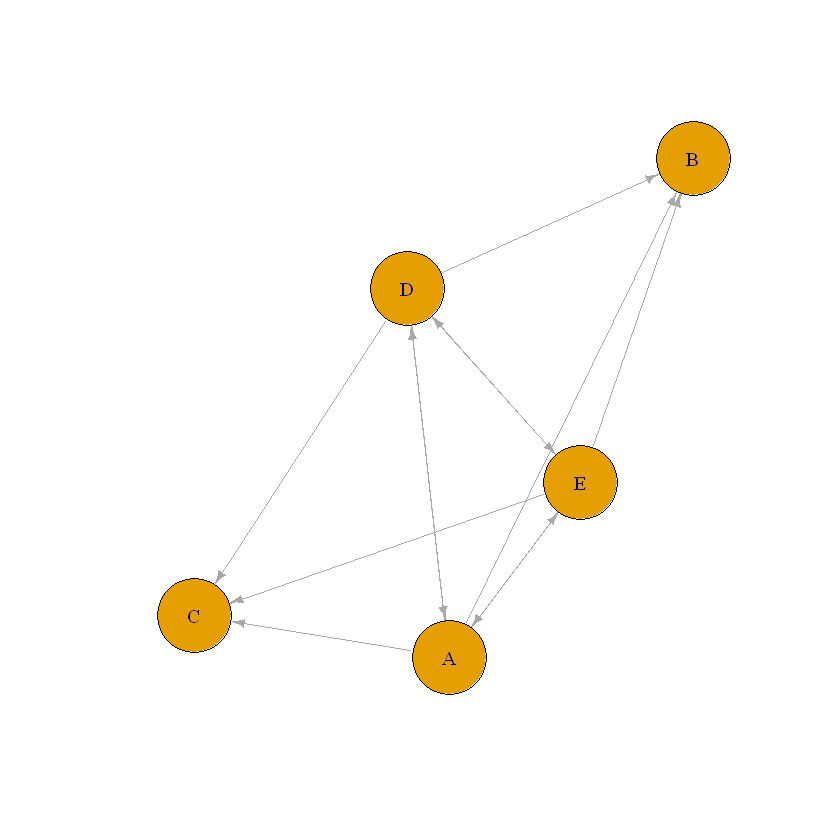

In [3]:
# the "P" matrix hence is:
P <- matrix(c(0.18, 0.1, 0.23, 0.02, 0.47,
              0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 1.0, 0.0, 0.0,
              0.31, 0.19, 0.21, 0.16, 0.13,
              0.22, 0.32, 0.08, 0.28, 0.10), nrow = 5, byrow = TRUE)
P
library(igraph)
# Defining node labels
nodes <- c("A", "B", "C", "D", "E")

# Creating a directed graph
graph <- graph_from_adjacency_matrix(P, mode = "directed", weighted = TRUE, diag = FALSE)

# Plotting the state space diagram
plot(graph, vertex.label = nodes, vertex.size = 30, edge.arrow.size = 0.5)

#### (b) Assuming the initial distribution of states is A (13%), B (24%), C (32%), D (28%), and E (3%) calculating the distribution of states after 3 generations:
To calculate the distribution of states after 3 generations, we may use the matrix multiplication. The initial distribution of states can be represented as a row vector, and we repeatedly multiply this vector by the transition matrix to get the distribution after each generation.
##### Mathematically: v3 = v0 * P^3

In [4]:
# Defining the initial distribution vector
v0 <- c(0.13, 0.24, 0.32, 0.28, 0.03)

# Calculating the distribution after 3 generations
v3 <- v0 %*% P %*% P %*% P

# The result
print(v3)

         [,1]     [,2]      [,3]       [,4]       [,5]
[1,] 0.038977 0.406876 0.4856722 0.02772928 0.04074556


#### (c) Rewriting the stochastic matrix P in canonical form:
##### To rewrite the stochastic matrix P in canonical form, we need to identify the matrices R and Q such that: P = R + Q.
###### Let's find R and Q for the given stochastic matrix P:

In [2]:
P <- matrix(c(0.18, 0.1, 0.23, 0.02, 0.47,
              0.0, 1.0, 0.0, 0.0, 0.0,
              0.0, 0.0, 1.0, 0.0, 0.0,
              0.31, 0.19, 0.21, 0.16, 0.13,
              0.22, 0.32, 0.08, 0.28, 0.10), nrow = 5, byrow = TRUE)

# Find absorbing states (rows with 1 on the diagonal in P)
absorbing_states <- which(diag(P) == 1)

# Extract R (absorbing states) and Q (non-absorbing states)
R <- P[absorbing_states, absorbing_states]
Q <- P[-absorbing_states, -absorbing_states]

# Print R and Q
cat("R:\n")
print(R)

cat("\nQ:\n")
print(Q)

R:
     [,1] [,2]
[1,]    1    0
[2,]    0    1

Q:
     [,1] [,2] [,3]
[1,] 0.18 0.02 0.47
[2,] 0.31 0.16 0.13
[3,] 0.22 0.28 0.10


In this case, R represents the absorbing states, and Q represents the transient states.

####  (d) For each state, i, calculating the mean number of times that the process is in a transient state j, given it started in i.
#####  we may use the fundamental matrix approach. The fundamental matrix N is given by: N = (I-Q)^-1

In [3]:
# Given Q matrix (transient states)
Q <- matrix(c(0.18, 0.02, 0.47,
              0.31, 0.16, 0.13,
              0.22, 0.28, 0.10), nrow = 3, byrow = TRUE)

# Calculating the fundamental matrix N
N <- solve(diag(3) - Q)

# Printing the fundamental matrix N
cat("Fundamental Matrix N:\n")
print(N)

# Calculating the mean number of times in each transient state for each initial state
mean_times <- N - diag(3)

# Printing the mean number of times
cat("\nMean Number of Times in Transient States:\n")
print(mean_times)


Fundamental Matrix N:
          [,1]      [,2]      [,3]
[1,] 1.5771433 0.3278775 0.8709793
[2,] 0.6741652 1.3908492 0.5529645
[3,] 0.5952642 0.5128565 1.4960506

Mean Number of Times in Transient States:
          [,1]      [,2]      [,3]
[1,] 0.5771433 0.3278775 0.8709793
[2,] 0.6741652 0.3908492 0.5529645
[3,] 0.5952642 0.5128565 0.4960506


#### (e) For each state i, find the mean number of transitions before the process hits an absorbing state, given that the process starts in a transient state i.
##### This is done using the fundamental matrix N, where Mi = Nij - 1.

In [4]:
# Given Q matrix (transient states)
Q <- matrix(c(0.18, 0.02, 0.47,
              0.31, 0.16, 0.13,
              0.22, 0.28, 0.10), nrow = 3, byrow = TRUE)

# Calculating the fundamental matrix N
N <- solve(diag(3) - Q)

# Summing the elements of each row to get the mean number of transitions
mean_transitions_before_absorbing <- rowSums(N - diag(3))

# Printing the mean number of transitions before hitting an absorbing state
cat("Mean Number of Transitions Before Hitting Absorbing State:\n")
print(mean_transitions_before_absorbing)


Mean Number of Transitions Before Hitting Absorbing State:
[1] 1.776000 1.617979 1.604171


In [5]:
# Reshaping the result into a matrix
mean_transitions_matrix <- matrix(mean_transitions_before_absorbing, nrow = 1)

# Printing the mean number of transitions before hitting an absorbing state
cat("Mean Number of Transitions Before Hitting Absorbing State:\n")
print(mean_transitions_matrix)


Mean Number of Transitions Before Hitting Absorbing State:
      [,1]     [,2]     [,3]
[1,] 1.776 1.617979 1.604171


#### (f) For each state i, find the probability of ending in each of the absorbing states.
##### To find the probability of ending in each of the absorbing states for each transient state i, we use the following formula:
###### Probability of ending in absorbing state j given starting in transient state i = Nij×Rjj
If the absorbing state matrix R is a diagonal matrix, there is no need to multiply it separately with the fundamental matrix N if we are interested in the probability of ending in each absorbing state for each transient state i. The fundamental matrix N already contains this information.

In [15]:
# Printing the probability of ending in each absorbing state for each transient state i (same as N)
cat("Probability of Ending in Absorbing States for Each Transient State i:\n")
print(N)

Probability of Ending in Absorbing States for Each Transient State i:
          [,1]      [,2]      [,3]
[1,] 1.5771433 0.3278775 0.8709793
[2,] 0.6741652 1.3908492 0.5529645
[3,] 0.5952642 0.5128565 1.4960506


## Q3: Simulate a discrete random walk in Z^2 starting at the origin and moving north with probability p1, south with p = p2, east with p = p3, and west with p = p4.
#### P1=31/100 = 0.31, P2=40/100 = 0.40, P3=15/100 = 0.15, P4=10/100 = 0.10
#### To simulate a discrete random walk in the Z^2 plane with given probabilities for moving in different directions,we use a simple simulation in R: (walking 10 steps)

In [2]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initializing position
  position <- c(0, 0)
  
  # Defining possible moves
  moves <- c("North", "South", "East", "West")
  
  # Simulating random walk
  for (step in 1:steps) {
    # Generating a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Updating position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Prining current position
    cat("Step", step, ":", "Current Position =", position, "\n")
  }
  
  return(position)
}

# Useing the corrected probabilities from student ID
p1 <- 0.31
p2 <- 0.40
p3 <- 0.15
p4 <- 0.10

# Setting number of steps
num_steps <- 10

# Simulating the random walk
final_position <- simulate_random_walk(num_steps, p1, p2, p3, p4)

# Printing final position
cat("Final Position after", num_steps, "steps =", final_position, "\n")


Step 1 : Current Position = 0 1 
Step 2 : Current Position = 1 1 
Step 3 : Current Position = 2 1 
Step 4 : Current Position = 2 0 
Step 5 : Current Position = 3 0 
Step 6 : Current Position = 3 1 
Step 7 : Current Position = 3 0 
Step 8 : Current Position = 3 -1 
Step 9 : Current Position = 4 -1 
Step 10 : Current Position = 4 -2 
Final Position after 10 steps = 4 -2 


#### (a) Plot 5 realisations of your walk with 2500 steps on the same plot

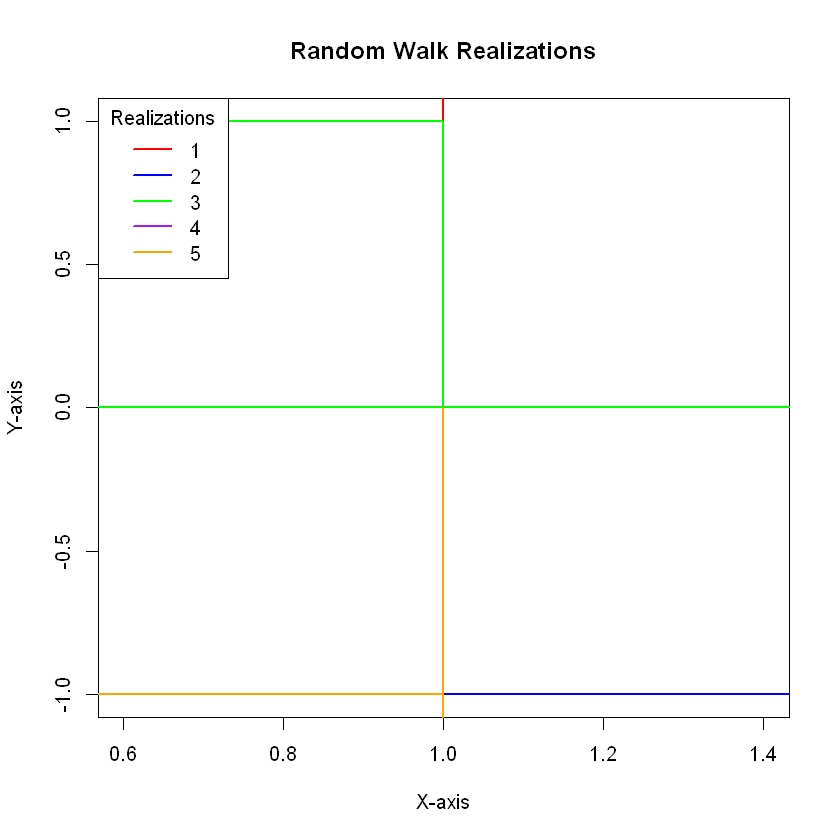

In [3]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initializing the position
  position <- c(0, 0)
  
  # Defining all possible moves
  moves <- c("North", "South", "East", "West")
  
  # Storing positions at each step
  positions <- matrix(0, ncol = 2, nrow = steps + 1)
  positions[1, ] <- position
  
  # Simulating the random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Updating the position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Storing current position
    positions[step + 1, ] <- position
  }
  
  return(positions)
}

# Setting probabilities based on student ID
p1 <- 0.31
p2 <- 0.40
p3 <- 0.15
p4 <- 0.10

# Setting number of steps
num_steps <- 2500

# Setting the number of realizations
num_realizations <- 5

# Plotting 5 realizations on the same plot
colors <- c("red", "blue", "green", "purple", "orange")
plot(0, type = "n", xlab = "X-axis", ylab = "Y-axis", main = "Random Walk Realizations")

for (i in 1:num_realizations) {
  random_walk <- simulate_random_walk(num_steps, p1, p2, p3, p4)
  lines(random_walk[, 1], random_walk[, 2], col = colors[i], lwd = 2)
}

legend("topleft", legend = 1:num_realizations, col = colors, lwd = 2, title = "Realizations")


#### (b) Calculating the expected length of the walk after 2500 steps

In [4]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initializing the position
  position <- c(0, 0)
  
  # Defining all possible moves
  moves <- c("North", "South", "East", "West")
  
  # Storing positions at each step
  positions <- matrix(0, ncol = 2, nrow = steps + 1)
  positions[1, ] <- position
  
  # Simulating the random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Updating the position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Storing current position
    positions[step + 1, ] <- position
  }
  
  return(positions)
}

# Setting probabilities based on student ID
p1 <- 0.31
p2 <- 0.40
p3 <- 0.15
p4 <- 0.10

# Setting number of steps
num_steps <- 2500

# Setting the number of walks
num_walks <- 1000 

# Simulating walks and calculating distances
distances <- numeric(num_walks)
for (i in 1:num_walks) {
  final_position <- simulate_random_walk(num_steps, p1, p2, p3, p4)
  distances[i] <- sqrt(sum(final_position^2))
}

# Calculating the average distance
average_distance <- mean(distances)

# Printting the result
cat("Average distance after", num_steps, "steps across", num_walks, "walks:", average_distance, "\n")


Average distance after 2500 steps across 1000 walks: 7881.651 


In [5]:
# Function to simulate a random walk
simulate_random_walk <- function(steps, p1, p2, p3, p4) {
  # Initializing the position
  position <- c(0, 0)
  
  # Defining all possible moves
  moves <- c("North", "South", "East", "West")
  
  # Storing positions at each step
  positions <- matrix(0, ncol = 2, nrow = steps + 1)
  positions[1, ] <- position
  
  # Simulating the random walk
  for (step in 1:steps) {
    # Generate a random move based on probabilities
    move <- sample(moves, 1, prob = c(p1, p2, p3, p4))
    
    # Updating the position based on the move
    if (move == "North") {
      position[2] <- position[2] + 1
    } else if (move == "South") {
      position[2] <- position[2] - 1
    } else if (move == "East") {
      position[1] <- position[1] + 1
    } else if (move == "West") {
      position[1] <- position[1] - 1
    }
    
    # Storing current position
    positions[step + 1, ] <- position
  }
  
  return(positions)
}

# Setting probabilities based on student ID
p1 <- 0.31
p2 <- 0.40
p3 <- 0.15
p4 <- 0.10

# Setting number of steps
num_steps <- 2500

# Setting the number of walks
num_walks <- 800 

# Simulating walks and calculating distances
distances <- numeric(num_walks)
for (i in 1:num_walks) {
  final_position <- simulate_random_walk(num_steps, p1, p2, p3, p4)
  distances[i] <- sqrt(sum(final_position^2))
}

# Calculating the average distance
average_distance <- mean(distances)

# Printting the result
cat("Average distance after", num_steps, "steps across", num_walks, "walks:", average_distance, "\n")


Average distance after 2500 steps across 800 walks: 7894.768 


#### Hence the average distance after 2500 steps across 1000 walks: around 7900
##### The simulate_random_walk function simulates a random walk. 
##### We run a specified number of walks (num_walks), and for each walk, we calculate the Euclidean distance of the final position from the starting point. 
##### The average distance is then calculated from all the distances obtained in the simulation.

## Q4 A generalised random walk is given by dS = a(x, t)dt + b(x, t)dW, where a(x, t), b(x, t) are given functions of space and time and dW is a Weiner process i.e. δW = ϵ√δt and ϵ is a random number normally distributed with a mean of 0 and a variance of 1.

#### (a) Simulating this random walk in 1 dimension with your own choice of a(x, t) and b(x, t)

#### To simulate a generalized random walk in 1 dimension given by dS = a(x, t)dt + b(x, t)dW, we use numerical methods such as the Euler-Maruyama method. This method discretizes the differential equation to perform the simulation.

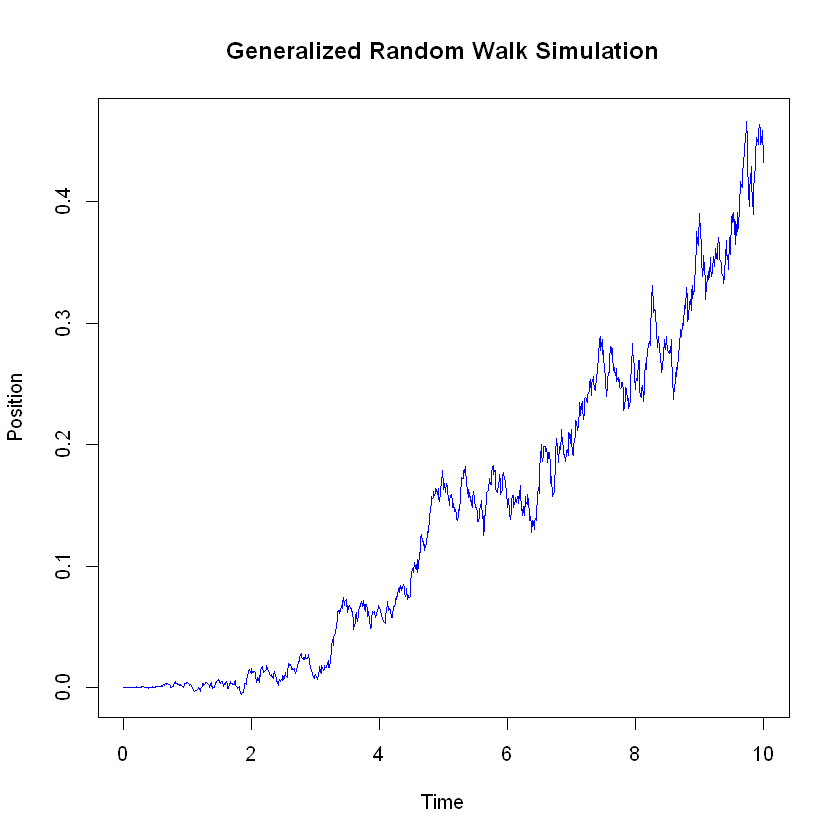

In [9]:
# Parameters
num_steps <- 1000  # Number of time steps
delta_t <- 0.01    # Time step size
epsilon <- rnorm(num_steps, mean = 0, sd = 1) * sqrt(delta_t)  # Wiener process increments

# Function to define a(x, t)
a <- function(x, t) {
  return(0.01 * x * t)  # Adjust the scaling factor
}

# Function to define b(x, t)
b <- function(x, t) {
  return(0.02 * sin(x) + 0.01 * t)  # Adjust the scaling factor
}

# Initializing arrays to store results
S <- numeric(num_steps + 1)
S[1] <- 0  # Initial condition

# Simulating the random walk
for (i in 1:num_steps) {
  S[i + 1] <- S[i] + a(S[i], i * delta_t) * delta_t + b(S[i], i * delta_t) * epsilon[i]
}

# Plotting the results
time <- seq(0, num_steps * delta_t, by = delta_t)
plot(time, S, type = "l", col = "blue", xlab = "Time", ylab = "Position", main = "Generalized Random Walk Simulation")


#### (b) Estimating the expected value for the walk after 2500 steps

In [10]:
# Function to simulate a generalized random walk
simulate_generalized_random_walk <- function(num_steps, delta_t, num_simulations) {
  epsilon_matrix <- matrix(rnorm(num_steps * num_simulations, mean = 0, sd = 1) * sqrt(delta_t), nrow = num_simulations)

  # Initializing arrays to store results
  S <- matrix(0, nrow = num_simulations, ncol = num_steps + 1)

  # Simulating random walks
  for (i in 1:num_simulations) {
    for (j in 1:num_steps) {
      S[i, j + 1] <- S[i, j] + a(S[i, j], j * delta_t) * delta_t + b(S[i, j], j * delta_t) * epsilon_matrix[i, j]
    }
  }

  return(S)
}

# Parameters
num_steps <- 2500
num_simulations <- 1000 

# Simulating generalized random walks
simulated_walks <- simulate_generalized_random_walk(num_steps, delta_t, num_simulations)

# Printting some diagnostic information
cat("Min final position:", min(simulated_walks[, num_steps + 1]), "\n")
cat("Max final position:", max(simulated_walks[, num_steps + 1]), "\n")

# Calculating the average final position after 2500 steps
average_final_position <- mean(simulated_walks[, num_steps + 1])

# Printing the result
cat("Average final position after", num_steps, "steps across", num_simulations, "simulations:", average_final_position, "\n")

Min final position: -13.09991 
Max final position: 18.50333 
Average final position after 2500 steps across 1000 simulations: -0.1659733 


#### (c) If the walk starts at x = 0, calculating the probability that x > 0 after 2500 steps

In [11]:
# Calculating the probability that x > 0 after 2500 steps
probability_x_positive <- sum(simulated_walks[, num_steps + 1] > 0) / num_simulations

# Printing the result
cat("Probability that x > 0 after", num_steps, "steps across", num_simulations, "simulations:", probability_x_positive, "\n")


Probability that x > 0 after 2500 steps across 1000 simulations: 0.473 


## Q5  simulate a random walk to estimate the value of π using the described approach.

In [13]:
# Function to simulate a random walk and estimate pi
simulate_pi_estimate <- function(num_points) {
  x <- runif(num_points, min = -1, max = 1)
  y <- runif(num_points, min = -1, max = 1)

  # Calculating distances from the origin
  distances <- sqrt(x^2 + y^2)

  # Counting points inside the circle
  points_inside_circle <- sum(distances <= 1)

  # Estimating pi using the ratio
  pi_estimate <- 4 * points_inside_circle / num_points

  return(pi_estimate)
}

# Number of random walks
num_walks <- 5

# Number of points in each walk
num_points_per_walk <- 12000

# Simulating random walks to estimate pi
pi_estimates <- sapply(1:num_walks, function(i) simulate_pi_estimate(num_points_per_walk))

# Printing the estimated values
cat("Estimated values of pi:", pi_estimates, "\n")


Estimated values of pi: 3.127667 3.136667 3.108 3.130333 3.147333 


#### (a) Generating 5 chains, calculating the value of π after a large number of steps
##### To generate 5 chains and calculate the value of π after a large number of steps, you can modify the previous code to include multiple chains.

In [14]:
# Function to simulate a random walk and estimate pi
simulate_pi_estimate_chain <- function(num_points, burn_in) {
  x <- runif(num_points + burn_in, min = -1, max = 1)
  y <- runif(num_points + burn_in, min = -1, max = 1)

  # Calculating distances from the origin
  distances <- sqrt(x^2 + y^2)

  # Discarding burn-in samples
  distances <- distances[(burn_in + 1):(num_points + burn_in)]

  # Counting points inside the circle
  points_inside_circle <- sum(distances <= 1)

  # Estimating pi using the ratio
  pi_estimate <- 4 * points_inside_circle / num_points

  return(pi_estimate)
}

# Number of chains
num_chains <- 5

# Number of points and burn-in for each chain
num_points_per_chain <- 10000
burn_in_per_chain <- 1000  # Adjust as needed

# Simulating multiple chains to estimate pi
pi_estimates_chain <- sapply(1:num_chains, function(i) simulate_pi_estimate_chain(num_points_per_chain, burn_in_per_chain))

# Printing the estimated values
cat("Estimated values of pi for each chain:", pi_estimates_chain, "\n")


Estimated values of pi for each chain: 3.1656 3.1348 3.1112 3.1392 3.1044 


#### (b) Calculating an estimate for π and giving an estimate of the error.

In [15]:
# Calculating the overall estimate of pi
overall_pi_estimate <- mean(pi_estimates_chain)

# Calculating the standard deviation of the estimates
pi_estimate_std <- sd(pi_estimates_chain)

# Calculating the error (standard deviation / sqrt(number of chains))
error_estimate <- pi_estimate_std / sqrt(num_chains)

# Printing the results
cat("Overall estimate of pi:", overall_pi_estimate, "\n")
cat("Standard deviation of estimates:", pi_estimate_std, "\n")
cat("Error estimate:", error_estimate, "\n")


Overall estimate of pi: 3.13104 
Standard deviation of estimates: 0.02438459 
Error estimate: 0.01090512 
